<a href="https://colab.research.google.com/github/Nataliahfk/Telecom-X_-segundo-challenge/blob/main/Telecom_X_Clallenge_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Telecom X - Análisis de Evasión de Clientes**

La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El ánalisis contiene:

- Importación y manipulación de datos desde una API.
- Aplicación de los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.
- Creación de visualizaciones estratégicas para identificar patrones y tendencias.
- Análisis Exploratorio de Datos (EDA) e informe con insights relevantes.

##📌 Extracción

In [44]:
import requests
import pandas as pd
import json
import numpy as np

#accediedo a la API

url = ('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

# requests.get envía una solicitud HTTP GET a una URL específica.
respuesta = requests.get(url)
# Convierte la respuesta JSON (texto) a un objeto Python (dict o list).
data = respuesta.json()
# Creo el DataFrame
df = pd.DataFrame(data)
df


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [45]:
# Esto lo puedo hacer cuando descargo el archivo y lo guardo en mi PC
#df_json = pd.read_json('TelecomX_Data.json')
#df_json

##🔧 Transformación

###**Normalización DF**

In [46]:
df_normalizado = pd.json_normalize(data)
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


###**Renombrando las columnas y revisión**

In [47]:
# inplace=True 👉 Modifica el DataFrame original en el lugar
df_normalizado.rename(columns={
 'customerID':'id_cliente',
 'Churn':'abandono',
 'customer.gender':'genero_cliente',
 'customer.SeniorCitizen':'cliente_senior',
 'customer.Partner':'tiene_pareja',
 'customer.Dependents':'dependientes',
 'customer.tenure': 'meses_en_empresa',
 'phone.PhoneService':'servicio_telefonico',
 'phone.MultipleLines':'lineas_multiples',
 'internet.InternetService':'servicio_internet',
 'internet.OnlineSecurity':'seguridad_online',
 'internet.OnlineBackup':'respaldo_online',
 'internet.DeviceProtection':'proteccion_dispositivo',
 'internet.TechSupport':'soporte_tecnico',
 'internet.StreamingTV':'tv_streaming',
 'internet.StreamingMovies':'peliculas_streaming',
 'account.Contract':'tipo_contrato',
 'account.PaperlessBilling':'factura_electronica',
 'account.PaymentMethod':'metodo_pago',
 'account.Charges.Monthly':'cargo_mensual',
 'account.Charges.Total':'cargo_total'
}, inplace=True)

df_normalizado.head()

,id_cliente,abandono,genero_cliente,cliente_senior,tiene_pareja,dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [48]:
df_normalizado.columns

Index(['id_cliente', 'abandono', 'genero_cliente', 'cliente_senior',
       'tiene_pareja', 'dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago', 'cargo_mensual',
       'cargo_total'],
      dtype='object')

In [49]:
#verificación que no existan datos null
print('N° de Nulos:',df_normalizado.isnull().sum())

N° de Nulos: id_cliente                0
abandono                  0
genero_cliente            0
cliente_senior            0
tiene_pareja              0
dependientes              0
meses_en_empresa          0
servicio_telefonico       0
lineas_multiples          0
servicio_internet         0
seguridad_online          0
respaldo_online           0
proteccion_dispositivo    0
soporte_tecnico           0
tv_streaming              0
peliculas_streaming       0
tipo_contrato             0
factura_electronica       0
metodo_pago               0
cargo_mensual             0
cargo_total               0
dtype: int64


In [50]:
#Duplicados
print('N° de duplicados:', df_normalizado.duplicated().sum())

N° de duplicados: 0


In [51]:
# Verifique si hay valores únicos en cada columna
for columna in df_normalizado.columns:
  print(f"valores únicos en la columna'{columna}': {df_normalizado[columna].nunique()}")
  if df_normalizado[columna].nunique() < 20:
    print(df_normalizado[columna].unique())
  print('-' * 50)  # Línea divisoria para mejor visualización

valores únicos en la columna'id_cliente': 7267
--------------------------------------------------
valores únicos en la columna'abandono': 3
['No' 'Yes' '']
--------------------------------------------------
valores únicos en la columna'genero_cliente': 2
['Female' 'Male']
--------------------------------------------------
valores únicos en la columna'cliente_senior': 2
[0 1]
--------------------------------------------------
valores únicos en la columna'tiene_pareja': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'dependientes': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'meses_en_empresa': 73
--------------------------------------------------
valores únicos en la columna'servicio_telefonico': 2
['Yes' 'No']
--------------------------------------------------
valores únicos en la columna'lineas_multiples': 3
['No' 'Yes' 'No phone service']
--------------------------------------------------

In [52]:
info_abandono = df_normalizado.query("abandono == ''")
info_abandono.sample(10)

,id_cliente,abandono,genero_cliente,cliente_senior,tiene_pareja,dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7058,9717-WXVSB,,Male,0,No,No,1,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,18.90,18.9
2151,3007-KYUNZ,,Female,0,Yes,Yes,19,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.60,485.9
2613,3643-VBLHT,,Male,0,No,Yes,29,No,No phone service,DSL,...,Yes,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,45.00,1242.45
4992,6831-CJPWG,,Male,0,Yes,No,54,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,109.55,6118.95
5001,6840-YEOYJ,,Male,0,No,Yes,53,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,No,Credit card (automatic),62.85,3419.5
2913,4047-GGUUG,,Female,0,No,No,12,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.45,227.45
3844,5264-IWHMU,,Male,0,No,No,1,Yes,No,DSL,...,No,No,Yes,No,No,Month-to-month,No,Mailed check,49.05,49.05
6888,9499-EBKUR,,Male,0,No,No,72,Yes,Yes,DSL,...,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.30,5997.1
1160,1645-EFCGT,,Male,0,Yes,Yes,72,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.40,1363.25


In [53]:
# Vacíos o en blanco
# x.astype(str) convierte todos los valores de la columna a texto (string).
# .str.strip() elimina espacios en blanco al inicio y final de cada string.
# == '' compara si el valor, una vez convertido a string y sin espacios al inicio o final, es una cadena vacía.
valores_vacios = df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()
print(valores_vacios)

id_cliente                  0
abandono                  224
genero_cliente              0
cliente_senior              0
tiene_pareja                0
dependientes                0
meses_en_empresa            0
servicio_telefonico         0
lineas_multiples            0
servicio_internet           0
seguridad_online            0
respaldo_online             0
proteccion_dispositivo      0
soporte_tecnico             0
tv_streaming                0
peliculas_streaming         0
tipo_contrato               0
factura_electronica         0
metodo_pago                 0
cargo_mensual               0
cargo_total                11
dtype: int64


In [54]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero_cliente          7267 non-null   object 
 3   cliente_senior          7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   dependientes            7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   servicio_internet       7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

###**Limpieza Datos**

In [55]:
# Cambiando la columna 'cargo_total' a Float y reemplazar espacios vacíos por NaN
df_normalizado['cargo_total'] = df_normalizado['cargo_total'].replace('',np.nan)
# Convertir todo a numérico
df_normalizado['cargo_total'] = pd.to_numeric(df_normalizado['cargo_total'], errors='coerce')
print(df_normalizado['cargo_total'].dtypes)

float64


In [56]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id_cliente              7267 non-null   object 
 1   abandono                7267 non-null   object 
 2   genero_cliente          7267 non-null   object 
 3   cliente_senior          7267 non-null   int64  
 4   tiene_pareja            7267 non-null   object 
 5   dependientes            7267 non-null   object 
 6   meses_en_empresa        7267 non-null   int64  
 7   servicio_telefonico     7267 non-null   object 
 8   lineas_multiples        7267 non-null   object 
 9   servicio_internet       7267 non-null   object 
 10  seguridad_online        7267 non-null   object 
 11  respaldo_online         7267 non-null   object 
 12  proteccion_dispositivo  7267 non-null   object 
 13  soporte_tecnico         7267 non-null   object 
 14  tv_streaming            7267 non-null   

In [57]:
# Confirmar vacios en columna 'cargo_total'
datos_blanco= (df_normalizado['cargo_total'] == '').sum()
print('Los datos blancos en la columna cargo_total son:', datos_blanco)

Los datos blancos en la columna cargo_total son: 0


In [58]:
# Hay 224 datos en la columna 'abandono', corresponde al 3.08% , lo que no afecta al analisís si los datos son eliminados.
# Eliminar datos vacios en columna 'abandono'
df_normalizado = df_normalizado.dropna(subset=['abandono']) #Elimina solo las filas donde columna 'abandono' sean NaN (nulo)
df_normalizado = df_normalizado[df_normalizado['abandono'].str.strip() != '']
df_normalizado

,id_cliente,abandono,genero_cliente,cliente_senior,tiene_pareja,dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [59]:
# reindexar para que los índices queden consecutivos
df_normalizado=df_normalizado.reset_index(drop=True)
df_normalizado

,id_cliente,abandono,genero_cliente,cliente_senior,tiene_pareja,dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [60]:
# Confirmar vacios en columna 'abandono'
datos_blanco_abandono= (df_normalizado['abandono'] == '').sum()
print('Los datos blancos en la columna abandono son:', datos_blanco_abandono)

Los datos blancos en la columna abandono son: 0


In [61]:
# Confirmar vacios y blancos depués de la limpieza de datos
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
id_cliente,0
abandono,0
genero_cliente,0
cliente_senior,0
tiene_pareja,0
dependientes,0
meses_en_empresa,0
servicio_telefonico,0
lineas_multiples,0
servicio_internet,0


###**Limpieza de datos texto**

In [62]:
# limpieza columna id del cliente /.strip() elimina espacios en blanco al inicio y al final
df_normalizado['id_cliente'] = df_normalizado['id_cliente'].str.strip()
df_normalizado['id_cliente'].head(10)

,id_cliente
0,0002-ORFBO
1,0003-MKNFE
2,0004-TLHLJ
3,0011-IGKFF
4,0013-EXCHZ
5,0013-MHZWF
6,0013-SMEOE
7,0014-BMAQU
8,0015-UOCOJ
9,0016-QLJIS


In [63]:
#limpieza de la columna tipo_contrato
df_normalizado['tipo_contrato'] = df_normalizado['tipo_contrato'].str.lower()
df_normalizado['tipo_contrato'] = df_normalizado['tipo_contrato'].apply(lambda x: x.replace('-',' ').strip())
df_normalizado['tipo_contrato'].head(10)

,tipo_contrato
0,one year
1,month to month
2,month to month
3,month to month
4,month to month
5,month to month
6,two year
7,two year
8,month to month
9,two year


In [64]:
#limpieza de la columna metodo_pago
df_normalizado['metodo_pago'] = df_normalizado['metodo_pago'].str.lower().str.strip()
df_normalizado['metodo_pago'].sample(10)

,metodo_pago
2090,credit card (automatic)
1223,bank transfer (automatic)
4550,credit card (automatic)
5907,mailed check
1226,mailed check
1037,electronic check
2605,bank transfer (automatic)
1307,bank transfer (automatic)
4049,electronic check
1842,electronic check


In [65]:
info = df_normalizado.query("servicio_internet in ['No']")
info.sample(5)

,id_cliente,abandono,genero_cliente,cliente_senior,tiene_pareja,dependientes,meses_en_empresa,servicio_telefonico,lineas_multiples,servicio_internet,...,respaldo_online,proteccion_dispositivo,soporte_tecnico,tv_streaming,peliculas_streaming,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
1167,1722-LDZJS,No,Male,0,Yes,Yes,53,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,one year,No,credit card (automatic),20.20,1068.15
3865,5442-BXVND,No,Female,0,Yes,Yes,33,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,month to month,No,bank transfer (automatic),24.25,838.50
1385,2050-ONYDQ,No,Female,0,Yes,Yes,65,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,two year,No,credit card (automatic),26.00,1654.85
4148,5863-OOKCL,No,Female,0,No,No,10,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,month to month,No,mailed check,18.85,163.20
6690,9504-YAZWB,No,Female,0,No,No,53,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,two year,No,mailed check,20.25,1048.45


In [66]:
df_normalizado.describe()

,cliente_senior,meses_en_empresa,cargo_mensual,cargo_total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


##**📊 Carga y análisis**

In [67]:
# crear la columna "Cuentas_Diarias"
df_normalizado['cuentas_diarias']= df_normalizado['cargo_mensual']/30
df_normalizado[['cuentas_diarias','cargo_mensual']].tail()

,cuentas_diarias,cargo_mensual
7038,1.838333,55.15
7039,2.836667,85.10
7040,1.676667,50.30
7041,2.261667,67.85
7042,1.966667,59.00


##**Estandarización y transformación de datos**

In [68]:
df_normalizado.columns

Index(['id_cliente', 'abandono', 'genero_cliente', 'cliente_senior',
       'tiene_pareja', 'dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago', 'cargo_mensual',
       'cargo_total', 'cuentas_diarias'],
      dtype='object')

In [69]:
columnas_binario = ['abandono','tiene_pareja','dependientes','servicio_telefonico','factura_electronica']
df_normalizado[columnas_binario].sample(10)

,abandono,tiene_pareja,dependientes,servicio_telefonico,factura_electronica
567,No,No,No,Yes,Yes
13,No,No,No,Yes,Yes
2069,No,No,No,Yes,Yes
3092,No,Yes,Yes,Yes,Yes
2424,No,No,Yes,Yes,No
1474,Yes,No,No,Yes,Yes
3259,Yes,No,No,Yes,Yes
2014,No,Yes,No,Yes,Yes
5306,No,Yes,Yes,Yes,Yes
3246,No,Yes,Yes,Yes,Yes


In [70]:
## Transformar columnas binarias: 'Yes' en 1 y 'No' en 0
df_normalizado.loc[:, columnas_binario] = df_normalizado[columnas_binario].astype(str)
# Usa map en vez de replace
df_normalizado.loc[:, columnas_binario] = df_normalizado.loc[:, columnas_binario].apply(
    lambda col: col.map({'Yes': 1, 'No': 0})
)
print(df_normalizado.loc[:, columnas_binario].isna().sum())
df_normalizado[columnas_binario].sample(4)

abandono               0
tiene_pareja           0
dependientes           0
servicio_telefonico    0
factura_electronica    0
dtype: int64


,abandono,tiene_pareja,dependientes,servicio_telefonico,factura_electronica
2638,0,1,1,1,0
1119,0,0,1,1,0
3146,1,0,0,1,1
2205,0,1,1,1,1


In [71]:
df_normalizado['genero_cliente']= df_normalizado['genero_cliente'].replace({'Female': 'Femenino', 'Male': 'Masculino'})
df_normalizado['genero_cliente'].sample(4)

,genero_cliente
2175,Masculino
1882,Femenino
1769,Masculino
6911,Masculino


## 📊 Carga y análisis



In [72]:
df_normalizado.describe()

,cliente_senior,meses_en_empresa,cargo_mensual,cargo_total,cuentas_diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158723
std,0.368612,24.559481,30.090047,2266.771362,1.003002
min,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.500000,401.450000,1.183333
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.850000,3794.737500,2.995000
max,1.000000,72.000000,118.750000,8684.800000,3.958333


##**Distribución de evasión**

###**Recuento de evasión por variables categóricas**

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [74]:
print(df_normalizado['abandono'].unique())

[0 1]


In [75]:
print(df_normalizado.groupby(['genero_cliente', 'abandono']).size())

genero_cliente  abandono
Femenino        0           2549
                1            939
Masculino       0           2625
                1            930
dtype: int64


In [76]:
# Verifica
print(df_normalizado['cliente_senior'].unique())

[0 1]


In [77]:
# 👇 Reemplaza strings
df_normalizado['genero_cliente'] = df_normalizado['genero_cliente'].astype(str).str.strip().str.capitalize()
df_normalizado['abandono'] = df_normalizado['abandono'].astype(str).str.strip().str.capitalize()
df_normalizado['abandono'] = df_normalizado['abandono'].replace({'1': 'Yes', '0': 'No'})


# Verifica
print(df_normalizado['abandono'].unique())

fig = px.histogram(
    df_normalizado,
    x='genero_cliente',
    color='abandono',
    barmode='group',
    text_auto=True,
    title='Distribución de clientes por género y abandono',
    labels={
        'genero_cliente': 'Género del Cliente',
        'abandono': 'Estado de Abandono'
    },
    color_discrete_map={
        'Yes': '#E8A031',
        'No': '#2C5F77'
    }
)

fig.update_layout(
    xaxis_title='Género del Cliente',
    yaxis_title='Cantidad de Clientes',
    legend_title='Abandono',
    bargap=0.2,
    template='plotly_white',
    font=dict(size=14)
)

fig.show()

['No' 'Yes']


In [78]:
"""
df_normalizado['cliente_senior'] = df_normalizado['cliente_senior'].map({0: 'No Senior', 1: 'Senior'})

fig = px.histogram(
    df_normalizado,
    x='cliente_senior',
    color='abandono',
    barmode='group',
    text_auto=True,
    title='Distribución de clientes senior v/s abandono',
    labels={
        'cliente_senior': 'Cliente Senior',
        'abandono': 'Estado de Abandono'
    },
    color_discrete_map={
        'Yes': '#E8A031',
        'No': '#2C5F77'
    }
)

fig.update_layout(
    xaxis_title='Cliente',
    yaxis_title='Cantidad de Clientes',
    legend_title='Abandono',
    bargap=0.2,
    template='plotly_white',
    font=dict(size=14)
)

fig.show()
"""

"\ndf_normalizado['cliente_senior'] = df_normalizado['cliente_senior'].map({0: 'No Senior', 1: 'Senior'})\n\nfig = px.histogram(\n    df_normalizado,\n    x='cliente_senior',\n    color='abandono',\n    barmode='group',\n    text_auto=True,\n    title='Distribución de clientes senior v/s abandono',\n    labels={\n        'cliente_senior': 'Cliente Senior',\n        'abandono': 'Estado de Abandono'\n    },\n    color_discrete_map={\n        'Yes': '#E8A031',\n        'No': '#2C5F77'\n    }\n)\n\nfig.update_layout(\n    xaxis_title='Cliente',\n    yaxis_title='Cantidad de Clientes',\n    legend_title='Abandono',\n    bargap=0.2,\n    template='plotly_white',\n    font=dict(size=14)\n)\n\nfig.show()\n"

In [79]:
fig = px.histogram(
    df_normalizado,
    x='meses_en_empresa',
    color='abandono',
    barmode='group',  # igual a barras lado a lado
    text_auto=True,
    nbins=30,  # ajusta cantidad de rangos de meses
    color_discrete_map={
        'Yes': '#E8A031',  # Mostaza
        'No': '#2C5F77'    # Azul petróleo
    },
    title='Distribución de clientes por meses en la empresa y estado de abandono',
    labels={
        'meses_en_empresa': 'Meses en la Empresa',
        'abandono': 'Estado de Abandono'
    }
)

fig.update_layout(
    xaxis_title='Meses en la Empresa',
    yaxis_title='Cantidad de Clientes',
    legend_title='Abandono',
    bargap=0.1,
    template='plotly_white',
    font=dict(size=14)
)

fig.show()

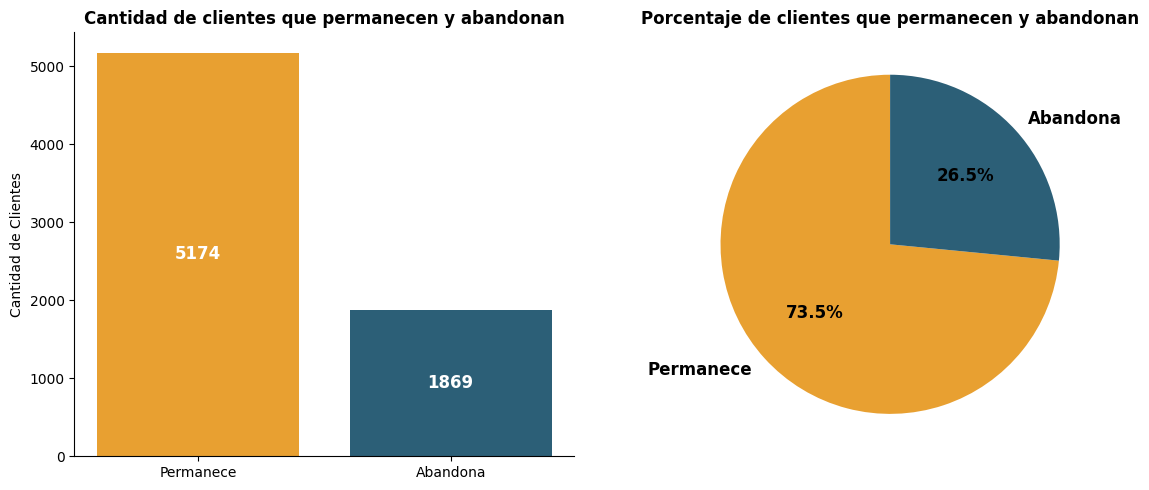

In [80]:
df_normalizado['abandono'] = (
    df_normalizado['abandono']
    .replace({'1': 'Yes', '0': 'No'})
    .astype(str)
    .str.strip()
    .str.capitalize()
)

# ✅ Crea figura con 1 fila y 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Cuenta valores
abandono_counts = df_normalizado['abandono'].value_counts().sort_index()
labels = abandono_counts.index.map({'Yes': 'Abandona', 'No': 'Permanece'})
fig.subplots_adjust(hspace=1, wspace=1) # espacio entre gráficos h de horizontal y w de ancho
colors = ['#E8A031', '#2C5F77']


# 📊 Gráfico de barras
bars = axs[0].bar(labels, abandono_counts.values, color=colors)
axs[0].set_title('Cantidad de clientes que permanecen y abandonan', fontsize=12, weight='bold')
axs[0].set_ylabel('Cantidad de Clientes')

# Agrega valores encima de cada barra
for bar in bars:
    height = bar.get_height()
    axs[0].text(
        bar.get_x() + bar.get_width() / 2, # X: centro de la barra
        height / 2,                        # Y: mitad de la barra
        f'{int(height)}',
        ha='center',                       # Alineación horizontal
        va='center',                       # Alineación vertical
        fontsize=12,
        weight='bold',
        color = 'white'
    )

# 📊 Gráfico de pastel
wedges, texts, autotexts = axs[1].pie(
    abandono_counts.values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12, 'weight': 'bold'}
)
axs[1].set_title('Porcentaje de clientes que permanecen y abandonan', fontsize=12, weight='bold')

# Limpia bordes superiores/derechos
for ax in axs.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [81]:
# Función para ver distribución de abandono por cada categoría
def evasion_por_categoria(df, columna):
    tabla = pd.crosstab(df_normalizado[columna], df_normalizado['abandono'], normalize='index') * 100
    tabla.columns = ['% Permanece', '% Abandono']
    print(f'\nAnálisis para: {columna}')
    print(tabla)
    return tabla

# Variables categóricas a analizar
categoricas = ['genero_cliente', 'tipo_contrato', 'metodo_pago', 'servicio_internet']

# Aplicar análisis
resultados = {}
for cat in categoricas:
    resultados[cat] = evasion_por_categoria(df_normalizado, cat)


Análisis para: genero_cliente
                % Permanece  % Abandono
genero_cliente                         
Femenino          73.079128   26.920872
Masculino         73.839662   26.160338

Análisis para: tipo_contrato
                % Permanece  % Abandono
tipo_contrato                          
month to month    57.290323   42.709677
one year          88.730482   11.269518
two year          97.168142    2.831858

Análisis para: metodo_pago
                           % Permanece  % Abandono
metodo_pago                                       
bank transfer (automatic)    83.290155   16.709845
credit card (automatic)      84.756899   15.243101
electronic check             54.714588   45.285412
mailed check                 80.893300   19.106700

Análisis para: servicio_internet
                   % Permanece  % Abandono
servicio_internet                         
DSL                  81.040892   18.959108
Fiber optic          58.107235   41.892765
No                   92.595020    7.404

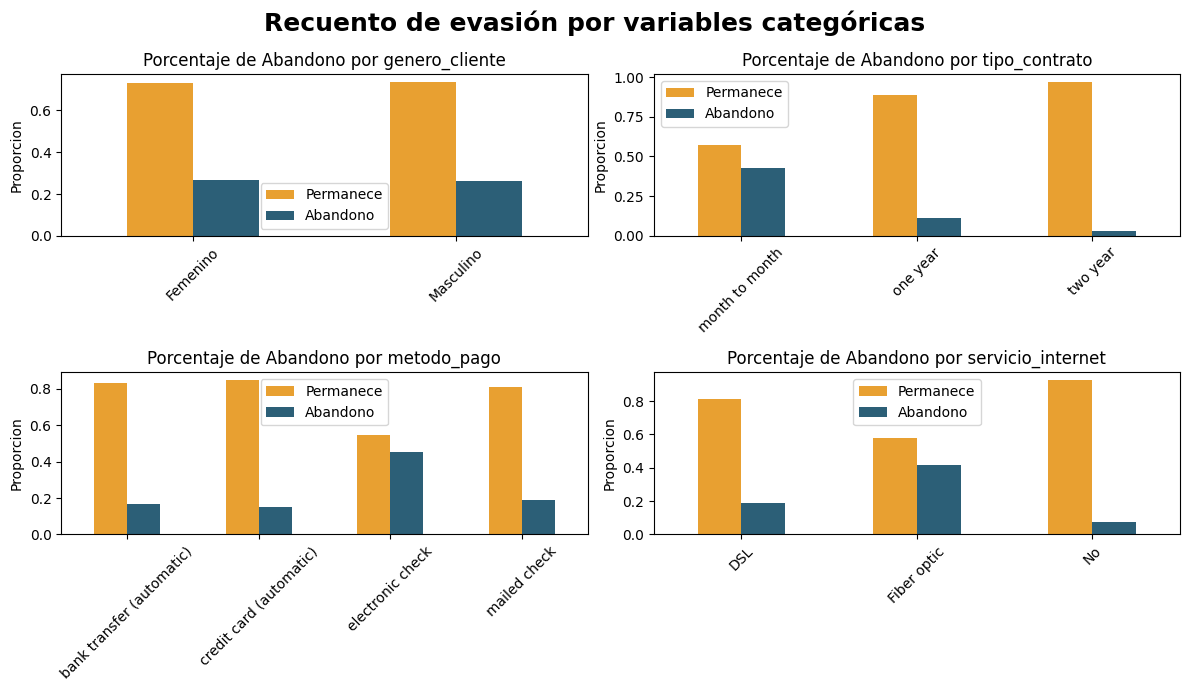

In [82]:
# 2 gráficos por fila
fig, axs = plt.subplots(nrows=(len(categoricas) + 1) // 2, ncols=2, figsize=(12,7))
axs = axs.flatten()
colors = ['#E8A031', '#2C5F77']

# Crear cada gráfico en su subplot
for i, cat in enumerate(categoricas):
    tabla = pd.crosstab(df_normalizado[cat], df_normalizado['abandono'], normalize='index')
    tabla.plot(kind='bar', ax=axs[i], color=colors)

    axs[i].set_title(f'Porcentaje de Abandono por {cat}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Proporcion')
    axs[i].legend(title='Abandono')
    axs[i].legend(['Permanece', 'Abandono'])
    axs[i].tick_params(axis='x', rotation=45)


plt.suptitle('Recuento de evasión por variables categóricas', fontsize=18, weight='bold', ha='center')

plt.tight_layout()
plt.show()

####**Análisis de evasión en columnas binarias**

In [84]:
binarias = ['cliente_senior', 'tiene_pareja', 'dependientes', 'servicio_telefonico', 'factura_electronica']

def evasion_cat_binarias(df, columna):
    df_temporal = df.copy()
    df_temporal[columna] = df_temporal[columna].map({1: 'Sí', 0: 'No'})

    tabla = pd.crosstab(df_temporal[columna], df_temporal['abandono'], normalize='index') * 100

    # Reindexa para forzar que siempre tenga ambas columnas, aunque no existan datos
    tabla = tabla.reindex(columns=['No', 'Yes'], fill_value=0)
    tabla.columns = ['% Permanece', '% Abandono']

    print(f'\nAnálisis para: {columna}')
    print(tabla)
    return tabla

# Variables categóricas a analizar
categoricas = ['tiene_pareja','dependientes','servicio_telefonico','factura_electronica']

# Aplicar análisis
resultados_binarios = {}
for col in binarias:
    resultados_binarios[col] = evasion_cat_binarias(df_normalizado, col)


Análisis para: cliente_senior
                % Permanece  % Abandono
cliente_senior                         
No                76.393832   23.606168
Sí                58.318739   41.681261

Análisis para: tiene_pareja
              % Permanece  % Abandono
tiene_pareja                         
No              67.042021   32.957979
Sí              80.335097   19.664903

Análisis para: dependientes
              % Permanece  % Abandono
dependientes                         
No              68.720860   31.279140
Sí              84.549763   15.450237

Análisis para: servicio_telefonico
                     % Permanece  % Abandono
servicio_telefonico                         
No                     75.073314   24.926686
Sí                     73.290363   26.709637

Análisis para: factura_electronica
                     % Permanece  % Abandono
factura_electronica                         
No                     83.669916   16.330084
Sí                     66.434908   33.565092


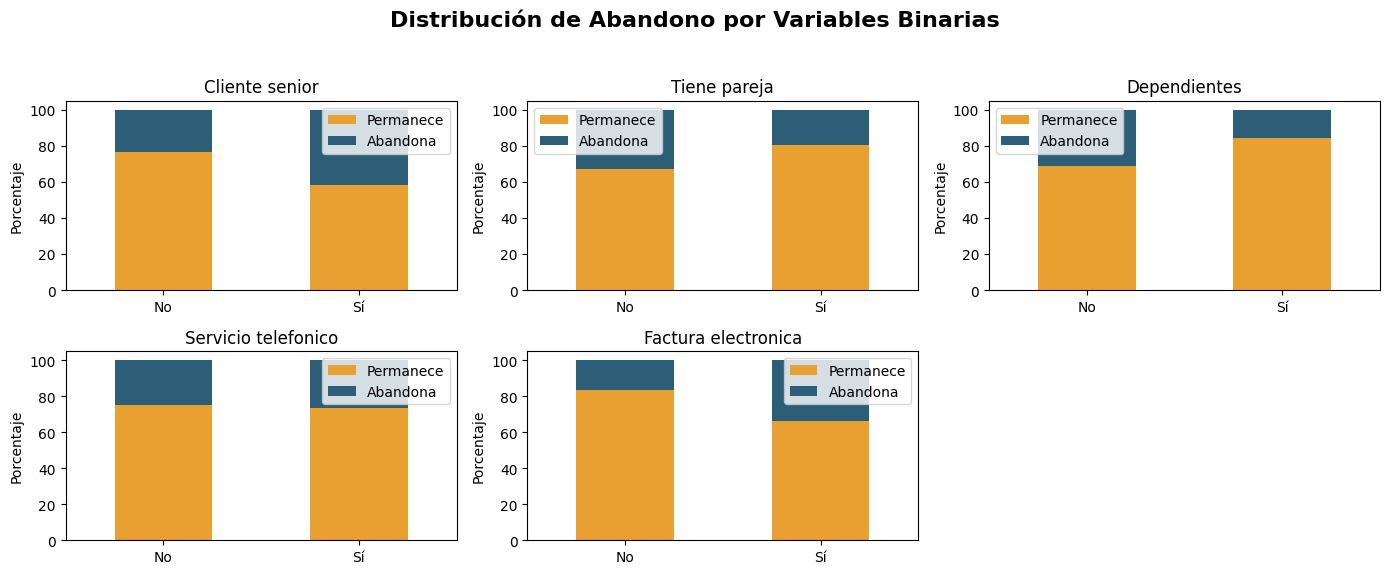

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axs = axes.flatten()
colors = ['#E8A031', '#2C5F77']

for i, col in enumerate(binarias):
    df_temporal = df_normalizado.copy()
    df_temporal[col] = df_temporal[col].map({1: 'Sí', 0: 'No'})

    tabla = pd.crosstab(df_temporal[col], df_temporal['abandono'], normalize='index') * 100
    tabla = tabla.reindex(columns=['No', 'Yes'], fill_value=0)  # Asegurar orden y columnas
    tabla.columns = ['Permanece', 'Abandona']

    tabla.plot(kind='bar', stacked=True, color=colors, ax=axs[i])

    axs[i].set_title(f'{col.replace("_", " ").capitalize()}', fontsize=12)
    axs[i].set_ylabel('Porcentaje')
    axs[i].set_xlabel('')
    axs[i].legend(loc='best')
    axs[i].tick_params(axis='x', rotation=0)

# Eliminar subplot vacío (si hay)
if len(binarias) < len(axs):
    for j in range(len(binarias), len(axs)):
        fig.delaxes(axs[j])

plt.suptitle('Distribución de Abandono por Variables Binarias',
             fontsize=16, weight='bold', ha='center')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [91]:
# Agrupa por cantidad de meses y abandono
resumen_meses = df_normalizado.groupby(['meses_en_empresa', 'abandono']).size().reset_index(name='conteo')

# Pivot para tabla
tabla_pivot = resumen_meses.pivot(
              index='meses_en_empresa',  # fila
              columns='abandono',        # columna
              values='conteo').fillna(0) # valores

# Calcular la tasa
tabla_pivot['tasa_abandono'] = ((tabla_pivot['Yes'] / (tabla_pivot['Yes'] + tabla_pivot['No'])) * 100).round(3)


print(tabla_pivot[['tasa_abandono']])


abandono          tasa_abandono
meses_en_empresa               
0                         0.000
1                        61.990
2                        51.681
3                        47.000
4                        47.159
...                         ...
68                        9.000
69                        8.421
70                        9.244
71                        3.529
72                        1.657

[73 rows x 1 columns]


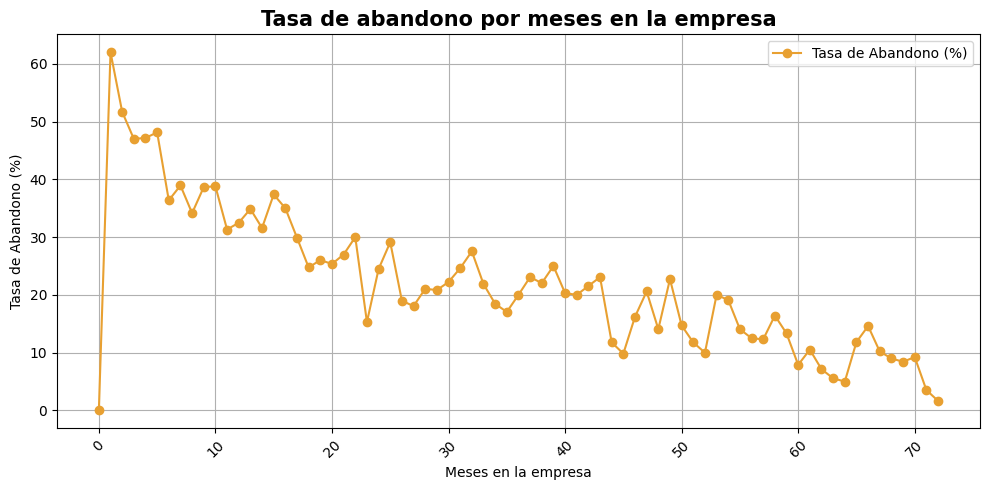

In [101]:
plt.figure(figsize=(10, 5))
plt.plot(tabla_pivot.index, tabla_pivot['tasa_abandono'], marker='o', color='#E8A031', label='Tasa de Abandono (%)')

plt.title('Tasa de abandono por meses en la empresa', fontsize=15, weight='bold')
plt.xlabel('Meses en la empresa')
plt.ylabel('Tasa de Abandono (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

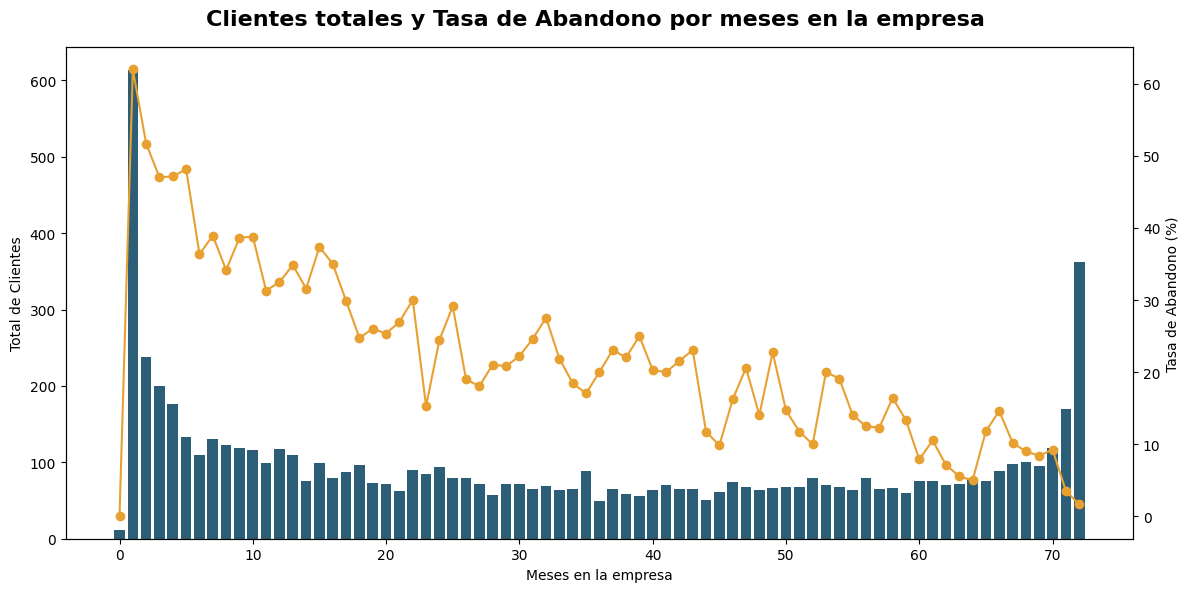

In [107]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barras: Total de clientes por meses en la cia.
total_clientes = tabla_pivot['Yes'] + tabla_pivot['No']
ax1.bar(tabla_pivot.index, total_clientes, color='#2C5F77', label='Total Clientes')
ax1.set_xlabel('Meses en la empresa')
ax1.set_ylabel('Total de Clientes', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Línea: tasa_abandono
ax2 = ax1.twinx()
ax2.plot(tabla_pivot.index, tabla_pivot['tasa_abandono'], color='#E8A031', marker='o', label='Tasa de Abandono (%)')
ax2.set_ylabel('Tasa de Abandono (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Títulos y leyenda
fig.suptitle('Clientes totales y Tasa de Abandono por meses en la empresa', fontsize=16, weight='bold')
fig.tight_layout()
plt.show()


###**Conteo de evasión por variables numéricas**

In [115]:
colors = {'Yes': '#E8A031', 'No': '#2C5F77'}  # Ajusta según los valores que tengas en 'abandono'

fig = px.scatter(
    df_normalizado,
    x="meses_en_empresa",
    y="cargo_mensual",
    color='abandono',
    color_discrete_map=colors, # comando para utilizar colores definidos arriba
    title="Meses en la empresa vs Cargos mensuales por Abandono"
)

fig.show()

In [119]:
colors = {'Yes': '#E8A031', 'No': '#2C5F77'}

fig = px.histogram(
    df_normalizado,
    x='tipo_contrato',
    color='abandono',
    barmode='group',
    text_auto=True,
    color_discrete_map=colors,
    title='Distribución por Tipo de Contrato y Abandono'
)

fig.show()

In [122]:
colors = {'Yes': '#E8A031', 'No': '#2C5F77'}

fig = px.box(df_normalizado, x = 'abandono', y = 'cargo_mensual', color = 'abandono', color_discrete_map=colors)

fig.show()

In [116]:
df_normalizado.columns

Index(['id_cliente', 'abandono', 'genero_cliente', 'cliente_senior',
       'tiene_pareja', 'dependientes', 'meses_en_empresa',
       'servicio_telefonico', 'lineas_multiples', 'servicio_internet',
       'seguridad_online', 'respaldo_online', 'proteccion_dispositivo',
       'soporte_tecnico', 'tv_streaming', 'peliculas_streaming',
       'tipo_contrato', 'factura_electronica', 'metodo_pago', 'cargo_mensual',
       'cargo_total', 'cuentas_diarias'],
      dtype='object')